# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann, 2017-2020, O. Kaufmann et Q. Campeol, 2022-2023.  
## Séance 2

***
## 1. Manipulation et sorties graphiques

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.1 Imports</b>
</div>

In [67]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


In [68]:
%load_ext rpy2.ipython
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rpy2
import numpy as np

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.2 Charger le fichier de données
</b>
</div>

-  Chargez le contenu du fichier `Jura.txt` dans un DataFrame <code>Pandas</code> nommé <i>jura</i>.

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le fichier `Jura.txt` contient des données sur des métaux présents en traces dans les sols du Jura Suisse. <br>cf. <b>Goovaerts, P. 1997.</b> <i>Geostatistics for Natural Resources Evaluation.</i>  Oxford Univ. Press, New-York, 483 p. Appendix C  <br>
<br>
    <b>_Signification des variables_</b>  <br>
    <b>Xloc, Yloc:</b>  <br>
    Coordonnées dans un système local exprimées en km  <br>
<br>
    <b>Cd, Co, Cr, Cu, Ni, Pb, Zn:</b>  <br>
    teneurs exprimées en mg/kg de sol  <br>
<br>
    <b>Rock:</b><br>
    Type de substratum rocheux  <br>
    1: Argovien, 2: Kimmeridgien, 3: Sequanien, 4: Portlandien, 5: Quaternaire  <br>
<br>
    <b>Landuse:</b>  <br>
    Type d'occupation du sol  <br>
    1: Foret, 2: Paturages, 3: Prairies, 4: Cultures 
</div>

- Affichez les données

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le nombre d'échantillons est assez élevé.  <br>
    <code>head</code> et <code>tail</code> permettent de limiter l'affichage aux premiers ou aux derniers échantillons.
</div>

- Affichez les 5 premières lignes puis affichez les 3 dernières lignes.

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.3 Examiner le jeu de données</b>
</div>

In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e436f6d6269656e207920612d742d696c206427c3a96368616e74696c6c6f6e732064616e73206c65206a657520646520646f6e6ec3a96573203f200a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303030223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303030220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e202020203235390a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


-  Affichez un résumé du jeu de données, analysez-le et commentez-le

In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e5175656c6c657320736f6e74206c61206d6f79656e6e65206574206c61206d656469616e65206465732074656e6575727320656e206361646d69756d2064616e73206c657320c3a96368616e74696c6c6f6e7320646520736f6c3f0a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303031223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303031220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e202020204d6f79656e6e65203a20312e33303931206d672f6b672c204dc3a96469616e65203a20312e30373030206d672f6b670a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.4 Affichez le contenu du jeu de données sous forme graphique dans R
</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <code>plot</code> disponible dans <code>R</code>.<br>
<br>
    Vous pouvez fixer la taille des sorties graphiques en plaçant <code>%%R -w 800 -h 600</code> au début de la cellule. <br>Le code <code>-w 800</code> signifie 800 pixels de large et <code>-h 600</code>, 600 pixels de haut.<br>

</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.5 Afficher le contenu du jeu de données sous forme graphique dans Python</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <code>Pandas</code> offre la possibilité de représenter le DataFrame de façon analogue.
</div>

In [75]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e70642e706c6f7474696e672e736361747465725f6d6174726978286a7572612c20616c7068613d302e342c2066696773697a653d2831332c313029293b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


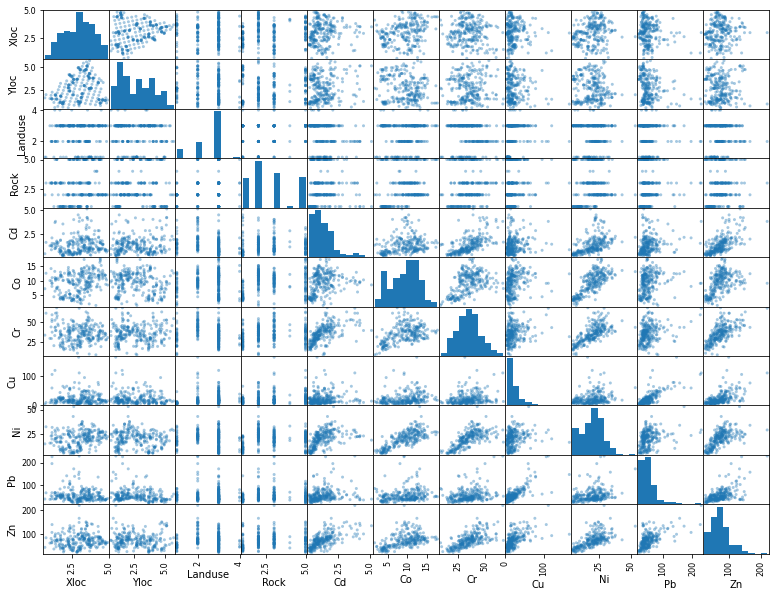

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Comment interprétez-vous ces graphiques? </div> <br>
</div>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.6 Examiner une distribution univariée</b>
</div>

-  Tracez l'histogramme de fréquences des teneurs en cadmium dans <code>Python</code>

In [76]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e5f2c206178203d20706c742e737562706c6f74732866696773697a653d28352c322929203c62723e0a6a7572612e6869737428636f6c756d6e3d274364272c2062696e733d31322c2061783d61782c2066616365636f6c6f723d276c69676874626c7565272c2065646765636f6c6f723d276b272c20677269643d46616c7365293b3c62723e0a61782e706c6f74285b6a7572612e43642e6d65616e28295d2a322c205b302c38305d2c20272d7227293c62723e0a61782e7365745f7469746c6528274364205b6d672f6b675d27293b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


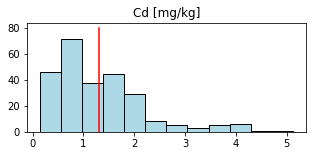

In [ ]:
# Résultat attendu ci-dessous...

- Tracez une boite à moustaches (<i>boxplot</i>) des teneurs en cadmium
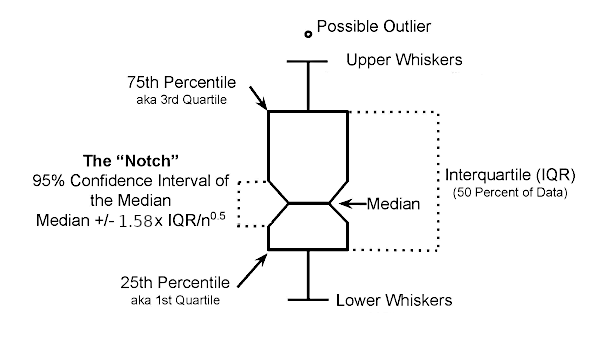

In [77]:
jura.boxplot?

In [78]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6178203d206a7572612e626f78706c6f7428636f6c756d6e3d274364272c20677269643d46616c73652c206e6f7463683d547275652c2066696773697a653d28342c35292c20626f6f7473747261703d31303030302c2073686f776d65616e733d547275652c3c62723e0a202020202020202020202020202020202020626f7870726f70733d7b27636f6c6f72273a27626c61636b277d2c20776869736b657270726f70733d7b27636f6c6f72273a27626c61636b277d293c62723e0a3c62723e0a61782e7365745f7469746c6528224a757261202d204361646d69756d22293c62723e0a61782e7365745f796c6162656c28275b6d672f6b675d27293b0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


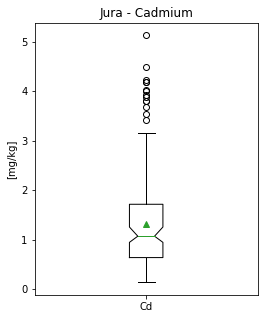

In [ ]:
# Résultat attendu ci-dessous...

- Afficher les différents quartiles et la moyenne des teneurs en cadmium

<b>Note:</b><br>    Les catégories d'occupation des sols et de substratum sont représentés dans le dataframe par des codes numériques.<br>
    <code>Pandas</code> offre la possibilité de les données catégorielles à l'aide du type <code>category</code>.<br>



- Définissez les associations entre codes et catégories pour les colonnes 'Landuse' et 'Rock' 

In [80]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6c616e64757365203d207b313a2022466f726574222c20323a2022506174757261676573222c20333a20225072616972696573222c20343a202243756c7475726573227d3c62723e0a726f636b203d207b313a20274172676f7669656e272c20323a20274b696d6d657269646769656e272c20333a202753657175616e69656e272c20343a2027506f72746c616e6469656e272c20353a20275175617465726e61697265277d0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Modifiez les colonnes 'Landuse' et 'Rock' pour en faire des colonnes de données catégorielles 

In [81]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6a7572615b274c616e64757365275d203d206a7572615b274c616e64757365275d2e617374797065282763617465676f727927293c62723e0a6a7572615b27526f636b275d203d206a7572615b27526f636b275d2e617374797065282763617465676f727927293c62723e0a6a7572615b274c616e64757365275d3d6a7572612e4c616e647573652e6361742e72656e616d655f63617465676f72696573286c616e64757365293c62723e0a6a7572615b27526f636b275d3d6a7572612e526f636b2e6361742e72656e616d655f63617465676f7269657328726f636b290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Tracez des boîtes à moustaches de la distribution en cadmium pour chaque type d'occupation des sols

In [82]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303035223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e62705f64696374203d206a7572612e626f78706c6f7428636f6c756d6e3d274364272c2062793d224c616e64757365222c20677269643d46616c73652c206e6f7463683d547275652c2066696773697a653d28382c35292c20626f6f7473747261703d31303030302c2073686f776d65616e733d547275652c3c62723e0a202020202020202020202020202020202020626f7870726f70733d7b27636f6c6f72273a2022626c61636b227d2c20776869736b657270726f70733d7b27636f6c6f72273a27626c61636b277d2c2070617463685f6172746973743d547275652c2072657475726e5f747970653d27626f746827293c62723e0a3c62723e0a3c62723e0a636f6c6f7273203d205b27666f72657374677265656e272c20276c696d65272c20276c69676874677265656e272c202773616e647962726f776e275d3c62723e0a666f7220726f775f6b65792c202861782c726f772920696e2062705f646963742e697465726974656d7328293a3c62723e0a2020202061782e7365745f7469746c6528224a757261202d204361646d69756d22293c62723e0a2020202061782e7365745f796c6162656c28275b6d672f6b675d27293c62723e0a20202020666f7220692c626f7820696e20656e756d657261746528726f775b27626f786573275d293a3c62723e0a2020202020202020626f782e7365745f66616365636f6c6f7228636f6c6f72735b695d290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


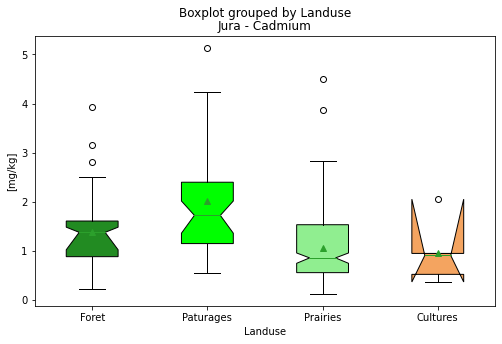

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.7 Tracer un graphe de y en fonction de x</b>
</div>

-  Tracez un graphe des teneurs en cobalt en fonction de celles en nickel

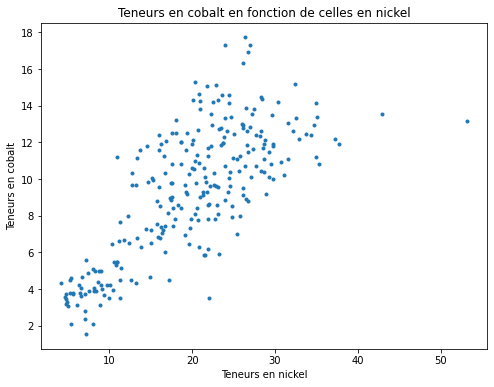

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Comment interprétez-vous ce graphique?
</div>

- Calculez la covariance entre les variables Co et Ni

In [ ]:
# Résultat attendu ci-dessous...

Covariance entre les variables Co et Ni : 22.103


- Calculez le coefficient de corrélation entre les variables Co et Ni

In [ ]:
# Résultat attendu ci-dessous...

Coefficient de corrélation entre les variables Co et Ni : 0.751


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.8 Construire un modèle de régression d'une variable sur une autre</b>
</div>


	Shapiro-Wilk normality test

data:  jura$Zn
W = 0.94545, p-value = 3.08e-08



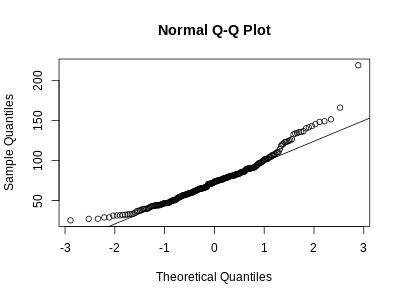

In [ ]:
# Résultat attendu ci-dessous...


	Shapiro-Wilk normality test

data:  log(jura$Zn)
W = 0.99159, p-value = 0.1451



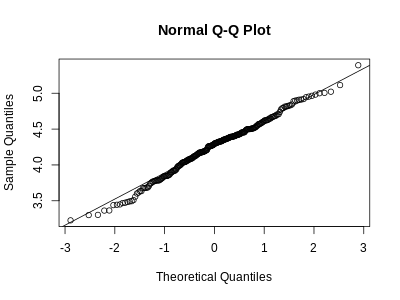

In [ ]:
# Résultat attendu ci-dessous...

In [88]:
jura = jura.drop(jura[jura['Zn'] == max(jura["Zn"])].index)


	Shapiro-Wilk normality test

data:  jura$Zn
W = 0.96325, p-value = 3.652e-06



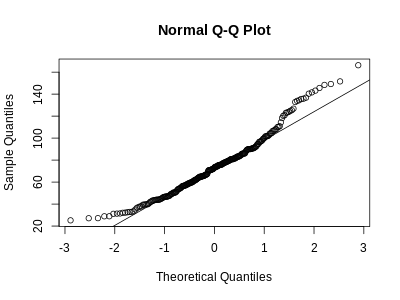

In [ ]:
# Résultat attendu ci-dessous...


	Shapiro-Wilk normality test

data:  log(jura$Zn)
W = 0.98819, p-value = 0.03294



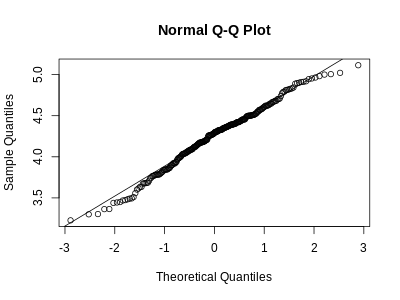

In [ ]:
# Résultat attendu ci-dessous...

<b>Note:</b><br>    Une approche courante pour faire des prédictions est de modéliser le lien entre la variable à prédire et une (ou plusieurs) autres variables (continues ou catégorielles). Le lien spatial n'est pas examiné ici. <br>



- Construisez un modèle de régression linéaire des teneurs en cobalt sur celles en nickel

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Dans <code>R</code>, utilisez la fonction <code>lm</code>, utilisez ensuite <code>summary</code> pour examiner la qualité de l'ajustement.
</div>

In [20]:
%%R
?lm

File: /tmp/RtmprISDSE/Rtxt57cd1fad8d5
lm                    package:stats                    R Documentation



_F_i_t_t_i_n_g _L_i_n_e_a_r _M_o_d_e_l_s



_D_e_s_c_r_i_p_t_i_o_n:



     ‘lm’ is used to fit linear models.  It can be used to carry out

     regression, single stratum analysis of variance and analysis of

     covariance (although ‘aov’ may provide a more convenient interface

     for these).



_U_s_a_g_e:



     lm(formula, data, subset, weights, na.action,

        method = "qr", model = TRUE, x = FALSE, y = FALSE, qr = TRUE,

        singular.ok = TRUE, contrasts = NULL, offset, ...)

     

_A_r_g_u_m_e_n_t_s:



 formula: an object of class ‘"formula"’ (or one that can be coerced to

          that class): a symbolic description of the model to be

          fitted.  The details of model specification are given under

          ‘Details’.



    data: an optional data frame, list or environment (or object

          co

<b>Note:</b><br>    Des tests de student (t-test) sont faits pour chaque paramètre du modèle pour tester s'il est probable d'obtenir une valeur du paramètre supérieure ou égale à celle calculée dans le cas de l'hypothèse <b>H</b><sub>0</sub></i>: <i>le paramètre est nul</i>.<br>     <br>
    Le test de Fischer (F-statistic) permet de tester l'hypothèse <i>H<sub>0</sub></i>: <i>tous les coefficiens hormis la constante sont nuls</i> contre l'hypothèse alternative <i>H<sub>A</sub></i>: <i>l'ajustement d'un modèle à intercept simple est significativement moins bon que celui du modèle proposé</i>.  <br>
    La <i>p-value</i> indique si l'on doit rejeter l'hypothèse <i>H<sub>0</sub></i> ou pas. Si la <i>p-value</i> est très faible, <b>H<sub>0</sub></b> est très peu probable et peut être rejetée.  <br>
    On peut alors s'intéresser au R². <br><br>
    Le R² indique la force de la relation entre la variable expliquée et le modèle.


In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e517565207369676e69666965206c6120736f72746965206465206c6120666f6e6374696f6e203c636f64653e73756d6d6172793c2f636f64653e206170706c697175c3a965206175206d6f64c3a86c652064652072656772657373696f6e3f0a202020205175656c6c657320736f6e7420766f7320636f6e636c7573696f6e73203f0a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303034223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303034220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e202020203c62723e0a20202020312e204c2765787072657373696f6e206475206d6f64c3a86c65203c62723e0a20202020322e20556e2072c3a973756dc3a92064652072c3a97369647573202876616c6575722072c3a9656c6c65202d2072c3a9706f6e7365206475206d6f64c3a86c6529203c62723e0a20202020332e204c657320636f656666696369656e7473206475206d6f64c3a86c65206c696ec3a961697265203c62723e0a20202020342e204c65732065727265757273207374616e646172642064657320636f656666696369656e7473206574206c612070726f626162696c6974c3a9207175652063657320636f656666696369656e747320736f69656e74206566666563746976656d656e74206e756c73203c62723e0a20202020352e204c27657374696d6174696f6e206465206c27c3a9636172742d74797065206465732072c3a97369647573206469737472696275c3a9732073656c6f6e20756e65206c6f69206e6f726d616c652028526573696475616c207374616e646164206572726f7229203c62723e0a20202020362e204c652052c2b220616a757374c3a92072656e736569676e6520737572206c612070726f706f7274696f6e2064652076617269616e6365206465206c61207661726961626c652064c3a970656e64616e7465206578706c697175c3a96520706172206c65206d6f64c3a86c652e20200a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


- Affichez sur un graphe les couples (Ni, Co) et la droite de regression

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <code>plot</code> et la fonction <code>abline</code>
</div>

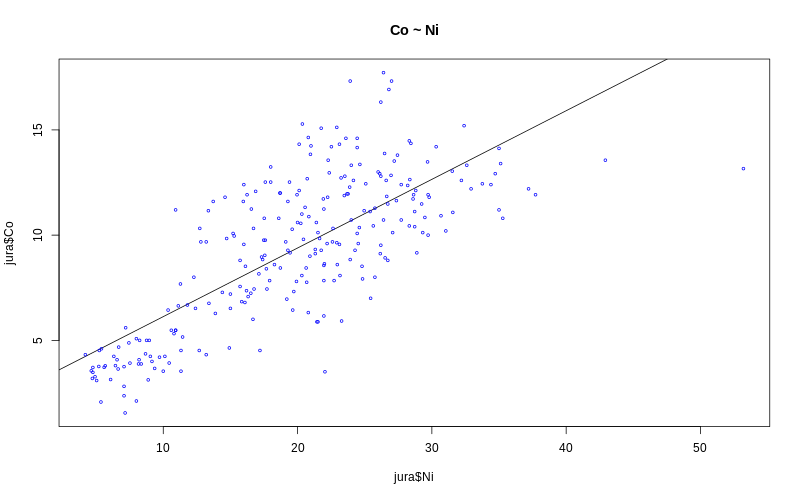

In [ ]:
# Résultat attendu ci-dessous...

- Affichez l'intervalle de confiance autour du modèle

In [24]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303036223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030362220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6820353030202d77203830303c62723e0a20203c62723e0a3c62723e0a764e69203d20736571286d696e286a757261244e69292c6d6178286a757261244e69292c6c656e6774682e6f7574203d20323539293c62723e0a636f6e665f696e74657276616c203c2d2070726564696374286669742c206e6577646174613d646174612e6672616d65284e693d764e69292c20696e74657276616c3d22636f6e666964656e6365222c6c6576656c203d20302e3939293c62723e0a3c62723e0a706c6f74286a757261244e692c206a75726124436f2c20786c61623d224e69222c20796c61623d22436f222c206d61696e3d22436f207e204e69222c61626c696e65286669742c20636f6c3d227265642229293c62723e0a6d61746c696e657328764e692c20636f6e665f696e74657276616c5b2c313a335d2c20636f6c203d2022626c7565222c206c74793d32293c62723e0a0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


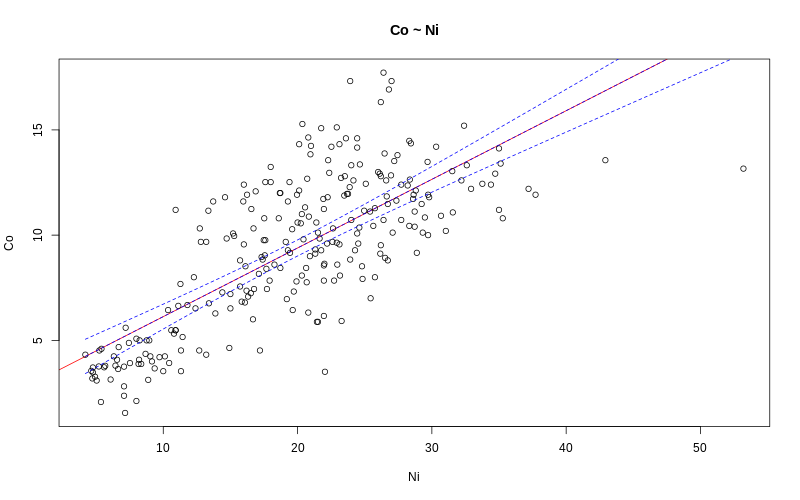

In [ ]:
# Résultat attendu ci-dessous...

-  Affichez sur un graphe les résidus en fonction de la teneur en nickel

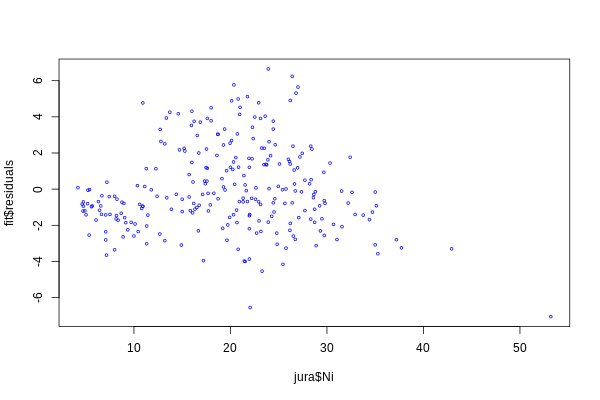

In [ ]:
# Résultat attendu ci-dessous...

- Affichez un graphe des résidus en identifiant les déviants

In [26]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303037223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030372220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6820353030202d77203830303c62723e0a20203c62723e0a3c62723e0a7265732e737464203c2d20727374616e646172642866697429202373747564656e74697a656420726573696475616c732073746f72656420696e20766563746f72207265732e737464203c62723e0a2320706c6f74205374616e64617264697a656420726573696475616c20696e207920617869732e205820617869732077696c6c2062652074686520696e646578206f7220726f77206e616d65733c62723e0a706c6f74287265732e7374642c20796c61623d225374616e64617264697a656420526573696475616c222c20796c696d3d63282d332e352c332e3529293c62723e0a232061646420686f72697a6f6e74616c206c696e657320746f206964656e746966792065787472656d652076616c7565733c62723e0a61626c696e6528683d63282d322c32292c20636f6c3d276f72616e6765272c206c7479203d2032293c62723e0a61626c696e6528683d63282d332c33292c20636f6c3d27726564272c206c7479203d2032293c62723e0a232066696e64206f7574207768696368206461746120706f696e74206973206f757473696465206f662033207374616e6461726420646576696174696f6e206375742d6f66663c62723e0a2320696e64657820697320726f77206e756d62657273206f662074686f736520706f696e743c62723e0a696e646578203c2d207768696368287265732e737464203e2033207c207265732e737464203c202d33293c62723e0a23206164642073616d706c65206e72206e65787420746f20706f696e7473207468617420686176652065787472656d652076616c75653c62723e0a7465787428696e6465782d382c207265732e7374645b696e6465785d202c206c6162656c73203d20726f776e616d6573286a7572615b696e6465782c5d29290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


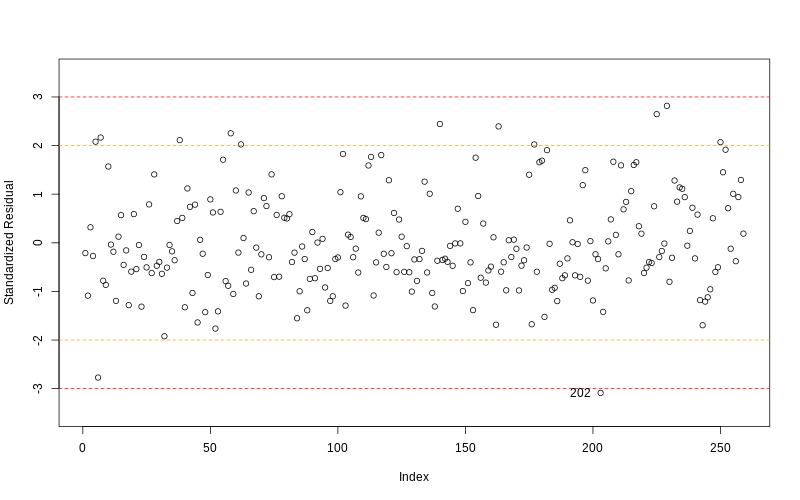

In [ ]:
# Résultat attendu ci-dessous...

In [27]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303038223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030382220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6820353030202d77203830303c62723e0a20203c62723e0a3c62723e0a706172286d66726f77203d206328322c203229293c62723e0a706c6f7428666974290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


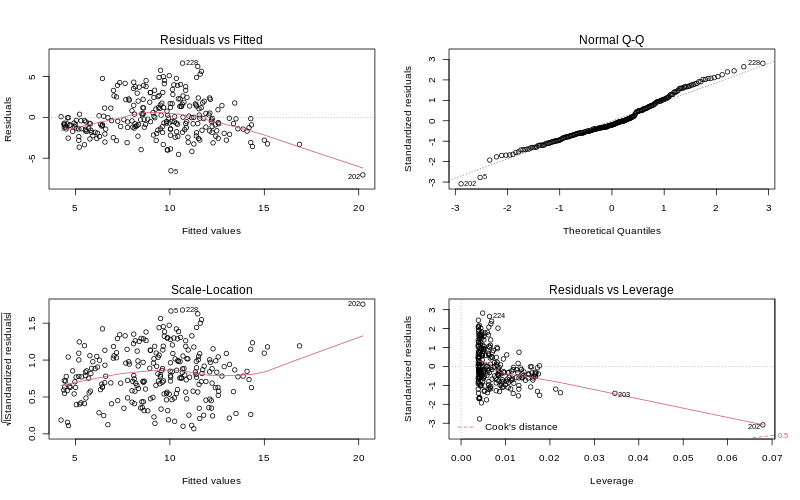

In [ ]:
# Résultat attendu ci-dessous...

<b>Note:</b><br>    <b>Graphe Residual vs Fitted</b> <br>
    Permet de vérifier si les résidus présentent une évolution non-linéaire. Si le modèle n'est pas capable de capturer tout le caractère non-linéaire d'une dépendance, cela apparaîtra sur ce graphe. Des résidus dispersés de part et d'autre d'une ligne horizontale dans ce graphe est un bon indicateur de l'absence d'une relation non-linéaire non capturée par le modèle.<br><br>
<br>
    <b>Graphe Normal Q-Q plot</b>   <br>
    Permet de vérifier si les résidus suivent une distribution normale.<br>  <br>
<br>
    <b>Graphe Scale-Location</b>   <br>
    Permet de vérifier la présence d'hétéroscedasticité. Si les résidus sont complètement aléatoirement répartis et la ligne est horizontale, on peut supposer l'homoscedasticité.<br>  <br>
<br>
    <b>Graphe Residual vs Leverage</b> <br>
    Permet d'identifier les cas qui ont de beaucoup d'influence sur l'ajustement du modèle. Certains déviants ont beaucoup d'influence sur l'ajustement alors que d'autre en auront peu.<br>
<br>
    - La distance de Cook mesure l'influence de l'observation _i_ sur l'estimation des paramètres du modèle. Toutes les distances devraient être du même ordre de grandeur. Sinon, les observations respectives biaisent l'estimation des coefficients de régression.<br>
<br>
    - Le _Leverage_ (effet de levier) mesure si l'observation est atypique par rapport aux variables explicatives. S'il l'est et que la distance de Cook est élevée, alors le cas a beaucoup d'influence sur l'ajustement.<br>
    </div>


In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e5175656c7320736f6e74206c65732064c3a97669616e7473203f0a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303035223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303035220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e202020204c27c3a96368616e74696c6c6f6e206ec2b03230322065737420636c616972656d656e742064c3a97669616e742c206c6573206ec2b035206574206ec2b0323238206c6520736f6e742073616e7320646f757465206175737369200a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


- Ecartez le ou les déviants et recalculer le modèle de régression 

In [28]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303039223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030392220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552203c62723e0a203c62723e0a3c62723e0a6a7572615f636c65616e203d206a7572615b2d3230332c5d202320323033c3a86d6520c3a96c656d656e742071756920706f727465206c27696e64657820323032206361722064616e732070616e646173206c27696e64657820636f6d6d656e636520c3a020302e2e2e3c62723e0a3c62723e0a6669745f636c65616e203c2d206c6d28436f207e204e692c20646174613d6a7572615f636c65616e293c62723e0a73756d6d617279286669745f636c65616e290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


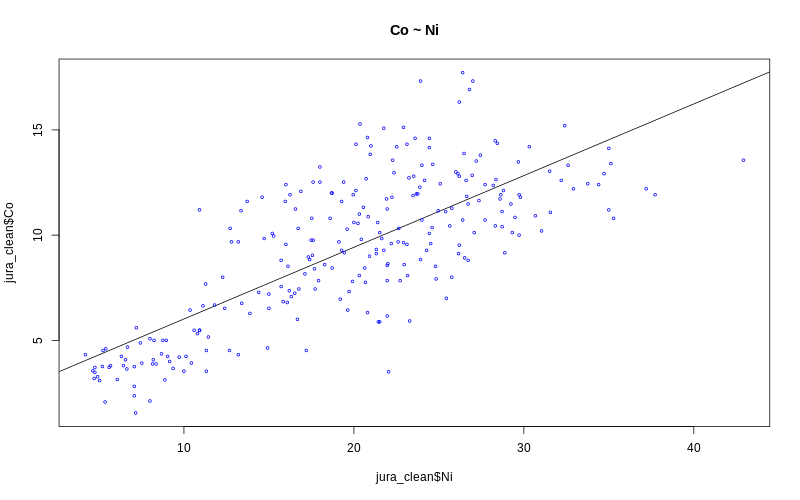

In [ ]:
# Résultat attendu ci-dessous...

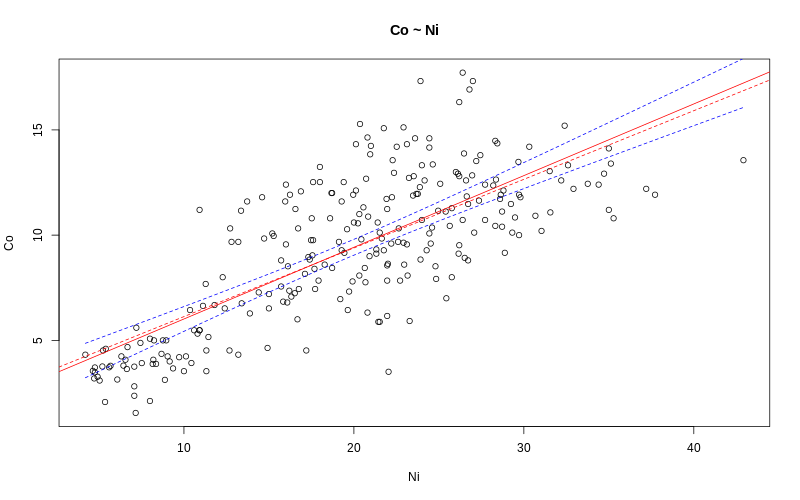

In [ ]:
# Résultat attendu ci-dessous...

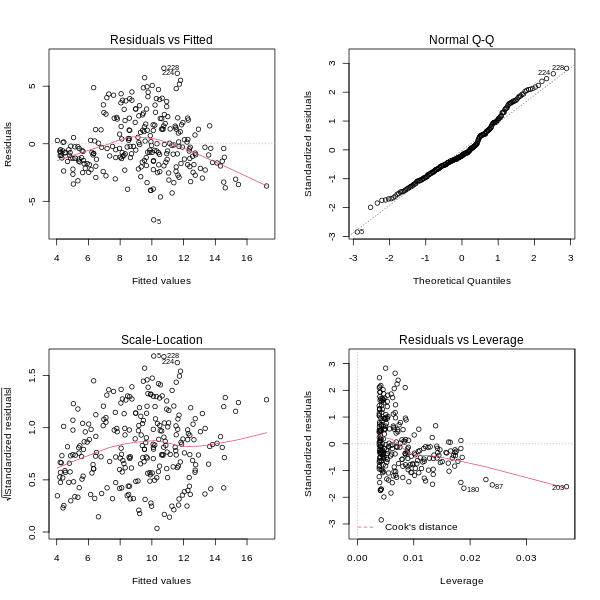

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Dans <code>R</code> les <code>factors</code> sont utilisés pour catégoriser les données et les stocker sous forme de niveaux.
</div>

- Associez des catégories aux codes de _Landuse_ et de _Rock_

In [32]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303130223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2525523c62723e0a3c62723e0a203c62723e0a6a757261244c616e64757365203c2d20666163746f72286a757261244c616e647573652c206c6576656c73203d206328312c322c332c34292c206c6162656c73203d20632827466f72c3aa74272c2027506174757261676573272c20275072616972696573272c202743756c74757265732729293c62723e0a6a75726124526f636b203c2d20666163746f72286a75726124526f636b2c206c6576656c73203d206328313a35292c206c6162656c73203d206328274172676f7669656e272c20274b696d6d657269646769656e272c202753657175616e69656e272c2027506f72746c616e6469656e272c20275175617465726e616972652729290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Calculez les moyennes des teneurs en nickel dans les sols pour les différentes occupations du sol  

In [33]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303131223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6a7572612e67726f7570627928274c616e6475736527292e6d65616e28295b5b274e69275d5d0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Examinez les distributions des valeurs des teneurs en nickel dans les échantillons à l'aide de _boxplots_ et superposez-y les moyennes par catégories

-  Construisez un modèle de régression du nickel sur le type de substratum

In [ ]:
# Résultat attendu ci-dessous...


Call:
lm(formula = Ni ~ Rock, data = jura)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6320  -4.0735  -0.3358   4.3065  28.2080 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       11.6558     0.9266  12.579  < 2e-16 ***
RockKimmeridgien  13.3362     1.1807  11.296  < 2e-16 ***
RockSequanien      8.4991     1.2573   6.760 9.43e-11 ***
RockPortlandien   12.0642     4.0034   3.014  0.00284 ** 
RockQuaternaire    7.0198     1.2984   5.406 1.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.746 on 254 degrees of freedom
Multiple R-squared:  0.339,	Adjusted R-squared:  0.3286 
F-statistic: 32.57 on 4 and 254 DF,  p-value: < 2.2e-16



In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e517565207369676e69666965206c6120736f72746965206465206c6120666f6e6374696f6e203c636f64653e73756d6d6172793c2f636f64653e206170706c697175c3a965206175206d6f64c3a86c652064652072656772657373696f6e3f0a202020205175656c6c657320736f6e7420766f7320636f6e636c7573696f6e73203f0a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303036223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303036220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e20202020312e204c2765787072657373696f6e206475206d6f64c3a86c65203c62723e0a20202020322e20556e2072c3a973756dc3a92064652072c3a97369647573202876616c6575722072c3a9656c6c65202d2072c3a9706f6e7365206475206d6f64c3a86c6529203c62723e20200a20202020332e204c657320636f656666696369656e7473206475206d6f64c3a86c65206c696ec3a9616972652c2064616e7320756e206d6f64c3a86c65206176656320646573207072c3a9646963746575727320636174c3a9676f7269656c732c206c27696e746572636570742072657072c3a973656e7465206c61206d6f79656e6e65207072c3a96469746520706f7572206c61207072656d69c3a8726520636c6173736520286963692c206c274172676f7669656e29206574206c65732061757472657320736f6e74206c65732064696666c3a972656e636573206465206c61206d6f79656e6e65207072c3a96469746520706f7572206c65732061757472657320636c617373657320636f6d706172c3a9657320c3a0206c612063656c6c65206465206c61207072656d69c3a872652e203c62723e202020200a20202020342e204c65732065727265757273207374616e646172642064657320636f656666696369656e7473206574206c612070726f626162696c6974c3a9207175652063657320636f656666696369656e747320736f69656e74206566666563746976656d656e74206e756c73203c62723e200a20202020352e204c27657374696d6174696f6e206465206c27c3a9636172742d74797065206465732072c3a97369647573206469737472696275c3a9732073656c6f6e20756e65206c6f69206e6f726d616c652028526573696475616c207374616e646164206572726f7229203c62723e200a20202020362e204c652052c2b220616a757374c3a92072656e736569676e6520737572206c612070726f706f7274696f6e2064652076617269616e6365206465206c61207661726961626c652064c3a970656e64616e7465206578706c697175c3a96520706172206c65206d6f64c3a86c652e20200a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


***
## 2. Représenter les points de mesures sur une carte dans python

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Une approche courante pour faire des prédictions est de modéliser le lien entre la variable à prédire et une (ou plusieurs) autres variables (continues ou catégorielles). Pour mettre en évidence un lien spatial la création de cartes peut s'avérer très utile. 
</div>

<b>Note:</b><br>    Vérifiez si les packages geopandas, ipyleaflet, contextily et mapclassify, ipywidgets et branca sont déjà installés et le cas échéant quelle est la version installée.<br>
<br>
    Si les packages ne sont pas installés, installez-les avec pipenv depuis le répertoire ou se trouve le Pipfile qui définit votre environnement virtuel <br> (ex: <code>pipenv install ipyleaflet</code>).


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.1 Représenter les points de mesures sur une carte avec <code>geopandas</code> et <code>contextily</code></b>
</div>

- Chargez les longitudes et latitudes stockées dans le fichier `Jura_WGS84_coords.txt` et ajoutez les longitudes et latitudes au jeu de donnnées <i>jura</i>. 

In [37]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303132223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6c6f6e676974756465203d2070642e726561645f63737628274a7572615f57475338345f636f6f7264732e747874272c207365703d225c7422293c62723e0a6a7572615f636f6f7264203d2070642e636f6e636174285b6a7572612c206c6f6e6769747564655d2c617869733d31293c62723e0a646973706c6179286a7572615f636f6f7264290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Tracez, à l'aide de <code>geopandas</code>, une carte présentant la valeur des points échantillonnés dans le système de coordonnées locales pour le **Cd** et le **Cu**.

In [38]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303133223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6764665f6a757261203d206770642e47656f446174614672616d65286a7572615f636f6f72642c2067656f6d657472793d6770642e706f696e74735f66726f6d5f7879286a7572615f636f6f72645b276c6f6e67275d2c206a7572615f636f6f72645b276c6174275d292c206372733d27657073673a3433323627293c62723e0a6669672c206178203d20706c742e737562706c6f7473286e726f77733d312c206e636f6c733d322c2066696773697a653d2831352c3529293c62723e0a6764665f6a7572612e706c6f7428274364272c2061783d61785b305d2c20636d61703d276a6574272c206c6567656e643d54727565293c62723e0a61785b305d2e7365745f7469746c65282254656e6575727320656e204361646d69756d22293c62723e0a61785b305d2e7365745f786c6162656c28274c6f6e67697475646527293c62723e0a3c62723e0a6764665f6a7572612e706c6f7428274375272c2061783d61785b315d2c20636d61703d276a6574272c206c6567656e643d54727565293c62723e0a61785b315d2e7365745f7469746c65282254656e6575727320656e2043756976726522293c62723e0a61785b315d2e7365745f786c6162656c28274c6f6e67697475646527293c62723e0a3c62723e0a61785b305d2e7365745f796c6162656c28274c6174697475646527293c62723e0a3c62723e0a782c20792c206172726f775f6c656e677468203d20302e392c20302e392c20302e313c62723e0a61785b305d2e616e6e6f7461746528274e272c2078793d28782c2079292c207879746578743d28782c20792d6172726f775f6c656e677468292c206172726f7770726f70733d646963742866616365636f6c6f723d27626c61636b27292c3c62723e0a20202020202020202020202068613d2763656e746572272c2076613d2763656e746572272c20666f6e7473697a653d32302c207879636f6f7264733d61785b305d2e7472616e7341786573293c62723e0a61785b315d2e616e6e6f7461746528274e272c2078793d28782c2079292c207879746578743d28782c20792d6172726f775f6c656e677468292c206172726f7770726f70733d646963742866616365636f6c6f723d27626c61636b27292c3c62723e0a20202020202020202020202068613d2763656e746572272c2076613d2763656e746572272c20666f6e7473697a653d32302c207879636f6f7264733d61785b315d2e7472616e7341786573290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


Text(0.9, 0.8, 'N')

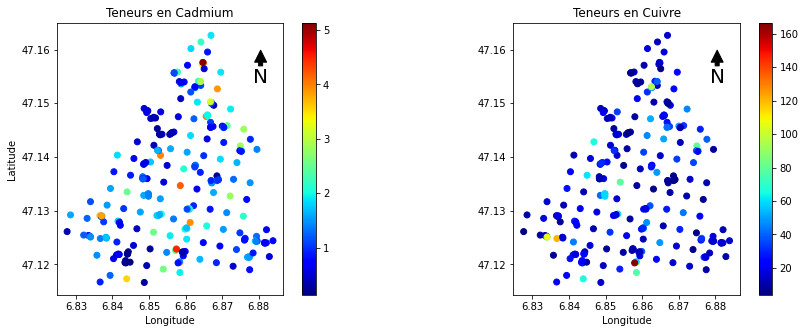

In [ ]:
# Résultat attendu ci-dessous...

- Ajoutez un fond de carte et un découpage en classes basé sur la distribution des teneurs

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le package python <code>contextily</code> permet de récupérer des tuiles depuis des serveurs de tuiles xyz et de les afficher dans une figure matplotlib. Par ailleurs, <code>geopandas</code>, couplé au package <code>mapclassify</code>, permet d'afficher les données en utilisant des méthodes de classification basées sur la distribution des valeurs (testez l'effet du choix des méthodes "quantiles", "equal_interval", "fisher_jenks"). 
</div>

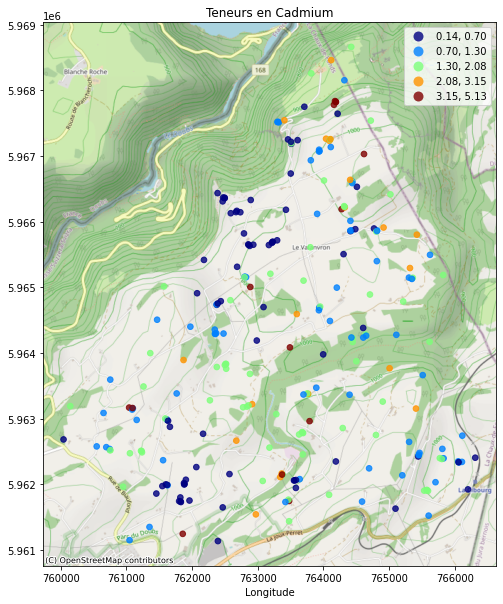

In [39]:
# @source @keep_output @reveal
import contextily as ctx

fig, ax = plt.subplots(figsize=(12,10))
gdf_jura.to_crs('epsg:3857').plot('Cd', ax=ax, cmap='jet',  scheme='fisher_jenks', markersize=32, alpha=0.8, legend=True) 
              # legend_kwds={'label': "[mg/kg]",'orientation': "horizontal"})
ax.set_title("Teneurs en Cadmium")
ax.set_xlabel('Longitude')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.CH)

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.2 Représenter les points de mesures sur une carte du monde interactive à l'aide du package <code>ipyleaflet</code></b>
</div>

In [40]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303134223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e66726f6d206970796c6561666c657420696d706f7274204d61702c2047656f446174612c20626173656d6170732c204c6179657273436f6e74726f6c3c62723e0a6d203d204d61702863656e7465723d2834372e31342c362e383735292c207a6f6f6d203d2031322c20626173656d61703d20626173656d6170732e457372692e576f726c64546f706f4d6170293c62723e0a3c62723e0a67656f5f64617461203d2047656f446174612867656f5f646174616672616d65203d206764665f6a7572612c3c62723e0a202020202020202020202020202020202020207374796c653d7b27636f6c6f72273a2027626c61636b272c202766696c6c436f6c6f72273a202723333336366363272c20276f706163697479273a302e30352c2027776569676874273a312e392c2027646173684172726179273a2732272c202766696c6c4f706163697479273a302e367d2c3c62723e0a20202020202020202020202020202020202020686f7665725f7374796c653d7b2766696c6c436f6c6f72273a202772656427202c202766696c6c4f706163697479273a20302e327d2c206e616d65203d20276764665f6a75726127293c62723e0a3c62723e0a6d2e6164645f6c617965722867656f5f64617461293c62723e0a6d2e6164645f636f6e74726f6c284c6179657273436f6e74726f6c2829293c62723e0a6d0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Créez une légende adaptée à la représentation des teneurs en cuivre avec le package <code>branca</code>

In [41]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303135223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e696d706f7274206970797769646765747320617320776964676574733c62723e0a696d706f7274206272616e63612e636f6c6f726d617020617320636d3c62723e0a3c62723e0a73746570203d20636d2e53746570436f6c6f726d6170285b27626c7565272c20276379616e272c2779656c6c6f77272c2027726564275d2c3c62723e0a2020202020202020202020202020202020202020202020766d696e203d20696e74286e702e6c6f67286764665f6a7572615b274375275d2e6d696e282929292c3c62723e0a2020202020202020202020202020202020202020202020766d6178203d20696e74286e702e6c6f67286764665f6a7572615b274375275d2e6d617828292929293c62723e0a636f6c6f726d6170203d20737465702e746f5f6c696e65617228293c62723e0a636f6c6f72626172203d20776964676574732e4f757470757428293c62723e0a636f6c6f726261722e617070656e645f646973706c61795f6461746128636f6c6f726d6170293c62723e0a636f6c6f72626172203d206970796c6561666c65742e576964676574436f6e74726f6c287769646765743d636f6c6f726261722c20706f736974696f6e3d27746f707269676874272c207472616e73706172656e745f62673d54727565293c62723e0a636f6c6f726d61700a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Affichez une carte représentant les teneurs en cuivre en utilisant cette légende

In [42]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303136223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303031362220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e66726f6d206970796c6561666c657420696d706f7274204d61702c204c6179657273436f6e74726f6c2c20436972636c652c204c6179657247726f75703c62723e0a6d203d204d61702863656e7465723d2834372e3133352c362e383735292c207a6f6f6d203d2031322c20626173656d61703d20626173656d6170732e457372692e576f726c64546f706f4d6170293c62723e0a3c62723e0a6d61726b657273203d205b5d3c62723e0a666f72206964782c20726f7720696e206764665f6a7572612e64726f706e6128292e69746572726f777328293a3c62723e0a20202020636972636c65203d20436972636c65286c6f636174696f6e3d28726f772e67656f6d657472792e792c20726f772e67656f6d657472792e78292c207261646975733d352c20636f6c6f723d636f6c6f726d6170286e702e6c6f6728726f775b274375275d2929293c62723e0a202020206d61726b6572732e617070656e6428636972636c65293c62723e0a3c62723e0a6c617965725f67726f7570203d204c6179657247726f7570286c61796572733d6d61726b6572732c206e616d653d276c6f672843752927293c62723e0a3c62723e0a6d2e6164645f6c61796572286c617965725f67726f7570293c62723e0a6d2e6164645f636f6e74726f6c28636f6c6f72626172293c62723e0a6d2e6164645f636f6e74726f6c284c6179657273436f6e74726f6c2829293c62723e0a6d0a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


***
<div class="alert alert-block alert-danger" align="center">
    <b>FIN DE LA DEUXIEME SEANCE</b>
</div>